In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
gj_aci = pd.read_csv('data/광진구 교통사고 전체(2014~2023).csv')
gj_aci

,사고번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2.014010e+15,2014년 1월,수요일,서울특별시 광진구 자양동,경상사고,0,0,2,1,차대차 - 추돌,...,맑음,단일로 - 교량,승용,남,31-40세,상해없음,승용,남,31-40세,경상
1,2.014010e+15,2014년 1월,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,21-30세,상해없음,승용,여,21-30세,부상신고
2,2.014010e+15,2014년 1월,수요일,서울특별시 광진구 중곡동,중상사고,0,1,0,0,차대차 - 충돌,...,맑음,단일로 - 기타,승용,남,61-64세,상해없음,이륜,남,51-60세,중상
3,2.014010e+15,2014년 1월,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,남,21-30세,상해없음,승용,남,31-40세,중상
4,2.014010e+15,2014년 1월,목요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,41-50세,상해없음,보행자,여,21-30세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,2.023123e+15,2023년 12월,토요일,서울특별시 광진구 화양동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,미분류 - 미분류,화물,남,41-50세,상해없음,보행자,남,51-60세,중상
10117,2.023123e+15,2023년 12월,토요일,서울특별시 광진구 자양동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,61-64세,상해없음,승용,남,61-64세,경상
10118,2.023123e+15,2023년 12월,토요일,서울특별시 광진구 자양동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31-40세,상해없음,승용,여,31-40세,경상
10119,2.023123e+15,2023년 12월,토요일,서울특별시 광진구 구의동,경상사고,0,0,1,0,차대차 - 추돌,...,기타,교차로 - 교차로부근,승용,남,31-40세,상해없음,승용,남,31-40세,경상


In [5]:
gj_aci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        10121 non-null  float64
 1   발생년월        10121 non-null  object 
 2   요일          10121 non-null  object 
 3   시군구         10121 non-null  object 
 4   사고내용        10121 non-null  object 
 5   사망자수        10121 non-null  int64  
 6   중상자수        10121 non-null  int64  
 7   경상자수        10121 non-null  int64  
 8   부상신고자수      10121 non-null  int64  
 9   사고유형        10121 non-null  object 
 10  법규위반        10121 non-null  object 
 11  노면상태        10121 non-null  object 
 12  기상상태        10121 non-null  object 
 13  도로형태        10121 non-null  object 
 14  가해운전자 차종    10121 non-null  object 
 15  가해운전자 성별    10121 non-null  object 
 16  가해운전자 연령대   10121 non-null  object 
 17  가해운전자 상해정도  10121 non-null  object 
 18  피해운전자 차종    9795 non-null   object 
 19  피해운전자 성별    9795 non-null

In [7]:
gj_aci['발생년도'] = gj_aci['발생년월'].str.split(' ', expand = True)[0].str.replace('년', '')
gj_aci['발생월'] = gj_aci['발생년월'].str.split(' ', expand = True)[1].str.replace('월', '')
gj_aci['발생월'] = gj_aci['발생월'].astype('int')

In [9]:
def split_season(a):
    if a // 3 == 1:
        return '봄'
    elif a // 3 == 2:
        return '여름'
    elif a // 3 == 3:
        return '가을'
    else:
        return '겨울'

발생계절
봄     2666
여름    2635
가을    2621
겨울    2199
Name: count, dtype: int64


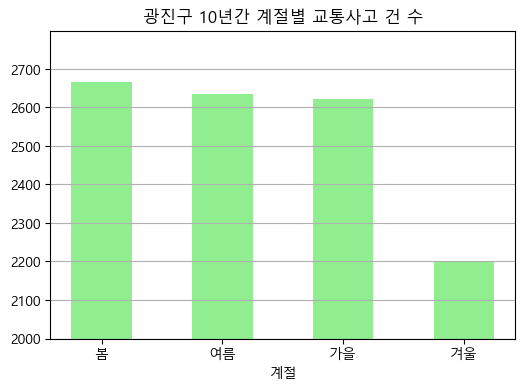

In [13]:
gj_aci['발생계절'] = gj_aci['발생월'].apply(split_season)
gj_aci_season = gj_aci['발생계절'].value_counts().reindex(['봄', '여름', '가을', '겨울'])
print(gj_aci_season)
plt.figure(figsize = (6,4))
plt.bar(gj_aci_season.index, gj_aci_season.values, color = 'lightgreen', width = 0.5)
plt.ylim(bottom = 2000)
plt.title('광진구 10년간 계절별 교통사고 건 수')
plt.grid(axis = 'y')
plt.xlabel('계절')
plt.show()

발생년도
2014    410
2015    326
2016    262
2017    267
2018    305
2019    245
2020    239
2021    232
2022    151
2023    198
Name: (발생월, 여름), dtype: int64


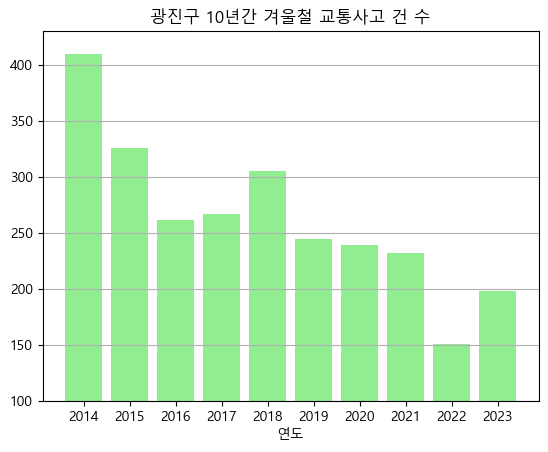

In [15]:
gj_aci_winter = gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack().iloc[:,3]
print(gj_aci_winter)
plt.bar(gj_aci_winter.index, gj_aci_winter.values, color = 'lightgreen')
plt.ylim(bottom = 100)
plt.title('광진구 10년간 겨울철 교통사고 건 수')
plt.grid(axis = 'y')
plt.xlabel('연도')
plt.show()

In [73]:
gj_aci_2014to23 = gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack()
gj_aci_2014to23.columns = ['가을', '겨울', '봄', '여름']
gj_aci_2014to23 = gj_aci_2014to23.reindex(['봄', '여름', '가을', '겨울'], axis = 1)
gj_aci_2014to23

10

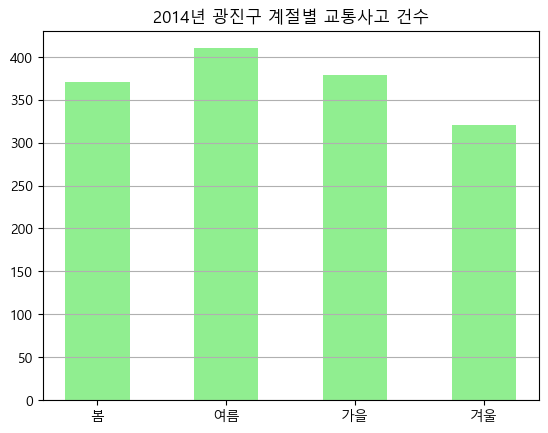

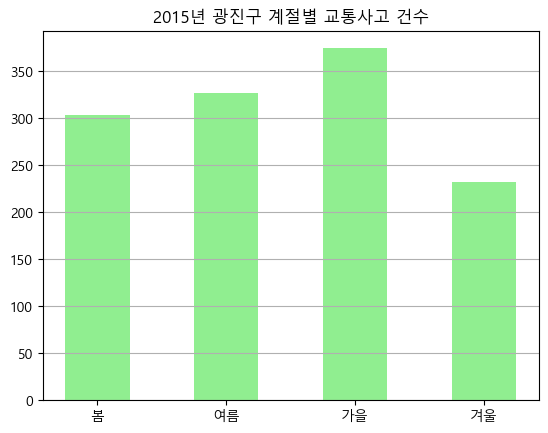

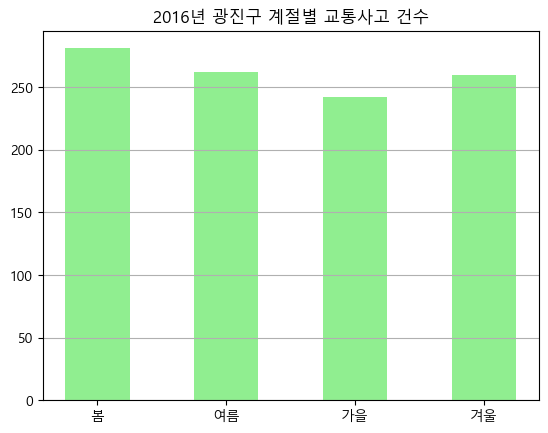

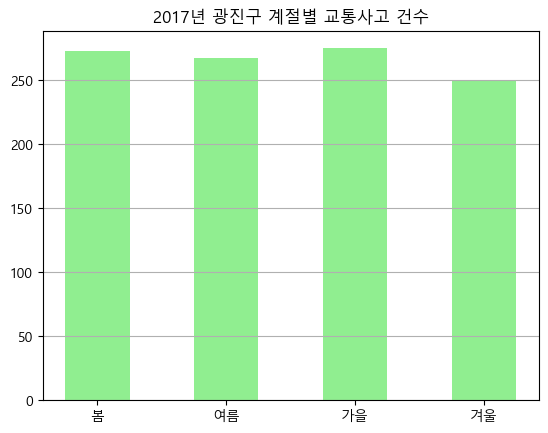

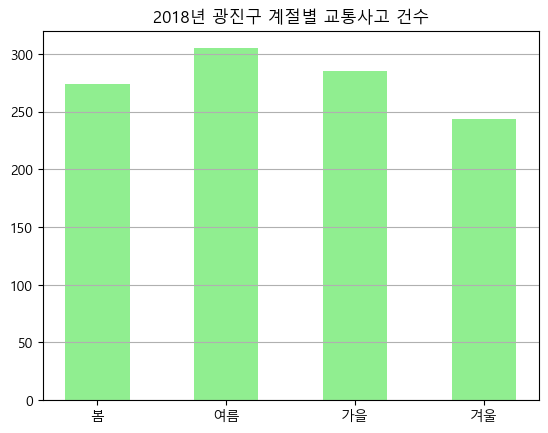

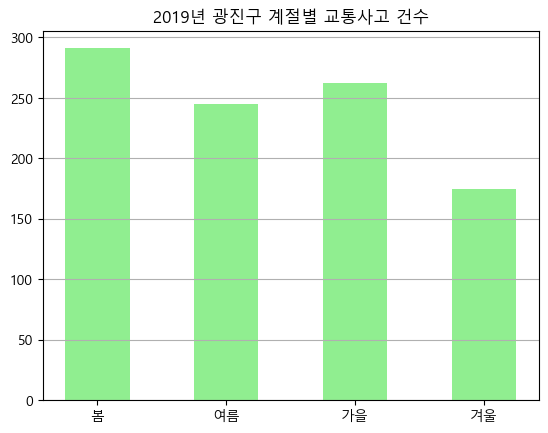

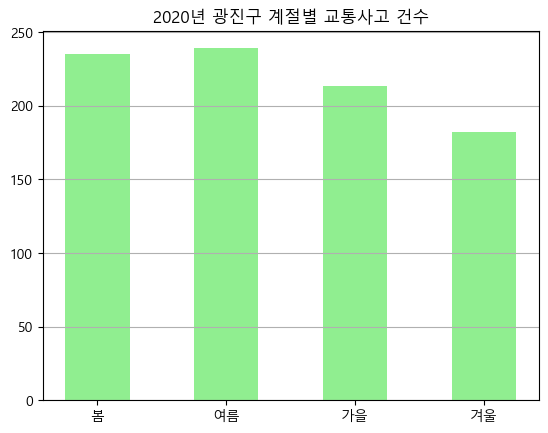

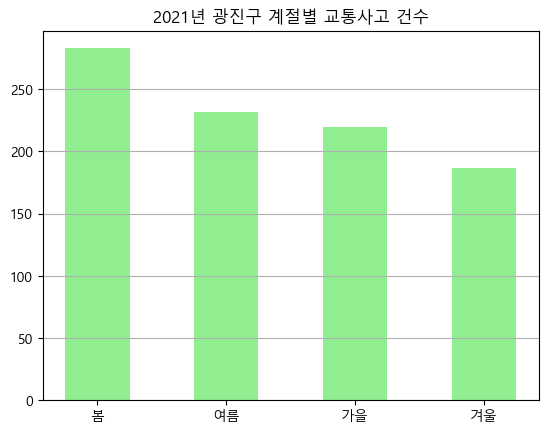

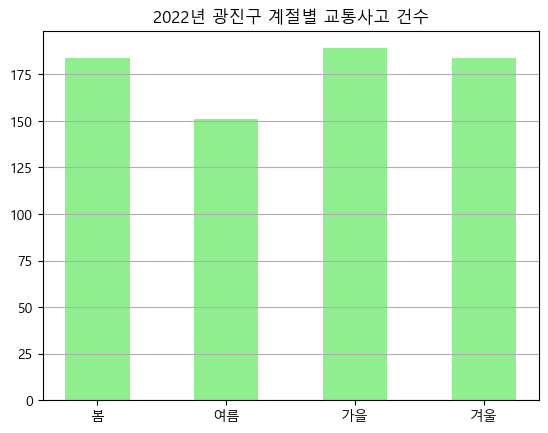

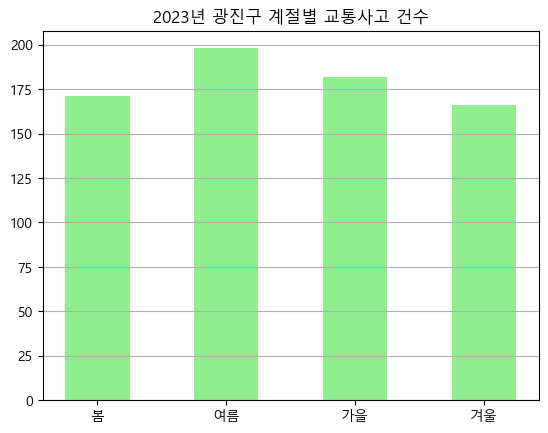

In [75]:
year = 2014
for i in range(len(gj_aci_2014to23)):
    gj_aci_2014to23_ = gj_aci_2014to23.iloc[i,:]
    plt.bar(gj_aci_2014to23_.index, gj_aci_2014to23_.values, width = 0.5, color = 'lightgreen')
    plt.title(f'{year+i}년 광진구 계절별 교통사고 건수')
    # plt.ylim(bottom = 250)
    plt.grid(axis = 'y')
    plt.show()

In [55]:
gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack().columns

MultiIndex([('발생월', '가을'),
            ('발생월', '겨울'),
            ('발생월',  '봄'),
            ('발생월', '여름')],
           names=[None, '발생계절'])